# 📊 Análise e Projeção de Acidentes Ferroviários no Brasil

## 🎯 Objetivo
Este notebook tem como objetivo realizar uma análise exploratória e uma projeção futura dos dados de acidentes ferroviários fornecidos pela **Agência Nacional de Transportes Terrestres (ANTT)**. Vamos investigar padrões históricos e, ao final, aplicar um modelo de série temporal para projetar a tendência de acidentes para os próximos dois anos.

## 💾 Fonte dos Dados
Os dados foram baixados em formato **JSON** a partir do **Portal Nacional de Dados Abertos**. A fonte original é mantida pela ANTT.
*   **Órgão:** Agência Nacional de Transportes Terrestres (ANTT)
*   **Referência:** [Dados de Acidentes Ferroviários](https://www.dados.gov.br/dados/conjuntos-dados/acidentes-ferroviarios)

## ⚙️ Metodologia
A análise será dividida nas seguintes etapas:
1.  **Carregamento dos Dados**: Leitura do arquivo **JSON** e carregamento em um DataFrame.
2.  **Limpeza e Preparação**: Tratamento de valores ausentes, conversão de tipos de dados e formatação.
3.  **Análise Exploratória (EDA)**: Geração de estatísticas descritivas e investigação de perguntas de negócio.
4.  **Visualização de Dados**: Criação de gráficos para comunicar os achados da análise.
5.  **🔮 Projeção (Forecasting)**: Utilização de modelos de séries temporais para projetar o número de acidentes futuros.

## 📚 Bibliotecas Utilizadas
Nesta análise, faremos uso das seguintes bibliotecas Python:
*   `pandas`: Para manipulação e análise dos dados.
*   `numpy`: Para operações numéricas.
*   `matplotlib`: Para a criação de gráficos e visualizações.
*   `statsmodels`: Para aplicar modelos estatísticos e de séries temporais.

## 1. 📂 Carregamento e Inspeção Inicial dos Dados
Nesta primeira etapa, vamos carregar as bibliotecas essenciais para nossa análise e ler o arquivo JSON contendo os dados de acidentes. Em seguida, faremos uma inspeção inicial para entender a estrutura e o formato do nosso DataFrame.

In [2]:
#Importando as bibliotecas necessárias para a análise
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot  as plt

#Comando que melhora a visualização dos gráficos no Jupyter Notebook
%matplotlib inline

#Imprimindo as versões das bibliotecas utilizadas
print ('A versão do Pandas utilizada nesse Projeto é', pd.__version__)
print ('A versão do NumPy utilizada nesse Projeto é', np.__version__)
print ('A versão do Matplot utilizada nesse Projeto é', mtl.__version__)

A versão do Pandas utilizada nesse Projeto é 2.3.0
A versão do NumPy utilizada nesse Projeto é 1.26.4
A versão do Matplot utilizada nesse Projeto é 3.8.0


In [9]:
#Carregando o arquivo JSON para um DataFrame do Pandas
df = pd.read_json('../data/dataset.json')
#Exbibindo as cinco primeiras linhas do DataFrame
df.head()

,Causa Contibutiva,N° de feridos,Gravidade,Double Stack,Serviço de Transporte,Hora da Ocorrência,Outra Ferrovia,PN,N° de óbitos,Natureza,...,Ano da Ocorrência,Interrupção,Quilômetro Final,Mercadoria,Quilômetro Inicial,Perímetro Urbano,Município,Equipagem,Prefixo,Estação Posterior
0,Sem Informação,0,Não,Sem Informação,Cargas,00:40,SI,Sim,0,Descarrilamento,...,2015,14.0,0.0,Sem Informação,450.0,Não,Acailandia,RAMILSON PEREIRA DE MORAIS,C210,Sem Informação
1,Sem Informação,0,Não,Sem Informação,Cargas,08:54,SI,Não,0,Descarrilamento,...,2012,0.0,0.0,Sem Informação,514.0,Não,Acailandia,ANTONIA JANAINA OLIVEIRA DOS SANTOS,C001,Sem Informação
2,Sem Informação,0,Não,Não,Cargas,11:53,SI,Não,0,Descarrilamento,...,2020,1.0,0.0,Minerio de Ferro,512.0,Não,Acailandia,CRISTIANO CHAVES DE ARAUJO,M130,Açailândia
3,Sem Informação,0,Não,Sem Informação,Cargas,22:11,SI,Não,0,Descarrilamento,...,2012,0.0,0.0,Sem Informação,513.0,Não,Acailandia,FELLIPE WESLEY LEOMIL,C058,Sem Informação
4,Sem Informação,0,Não,Sem Informação,Cargas,20:21,FNSTN,Não,0,Descarrilamento,...,2018,12.0,0.0,SOJA EM GRÃOS COMUM,473.0,Não,Acailandia,ADRIANO OLIVEIRA BATISTA,J314,Açailândia


In [5]:
#Agora com o .info() vamos obter um resumo técnico completo do DataFrame (tipo de dados, valores nulos, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13797 entries, 0 to 13796
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Causa Contibutiva       13797 non-null  object 
 1   N° de feridos           13797 non-null  int64  
 2   Gravidade               13797 non-null  object 
 3   Double Stack            13797 non-null  object 
 4   Serviço de Transporte   13797 non-null  object 
 5   Hora da Ocorrência      13797 non-null  object 
 6   Outra Ferrovia          13797 non-null  object 
 7   PN                      13797 non-null  object 
 8   N° de óbitos            13797 non-null  int64  
 9   Natureza                13797 non-null  object 
 10  Data da Ocorrência      13797 non-null  object 
 11  Cód. IBGE do Município  13797 non-null  int64  
 12  Concessionaria          13797 non-null  object 
 13  Linha                   13797 non-null  object 
 14  UF                      13797 non-null

## 🧹 2. Limpeza e Preparação dos Dados
Nesta seção, vamos "arrumar a casa". Um conjunto de dados limpo é a base para qualquer análise confiável. Nossas tarefas serão:
- Padronizar os nomes das colunas (removendo espaços e acentos).
- Substituir os valores de texto que indicam ausência de dados (como "Sem Informação") por um valor nulo padrão (`NaN`).
- Converter colunas para os tipos de dados corretos (especialmente a coluna de data).

In [6]:
#Padronizando os nomes de todas as colunas para o formato snake_case
df.columns = [
     'causa_contributiva', 'n_feridos', 'gravidade', 'double_stack', 'servico_transporte',
    'hora_ocorrencia', 'outra_ferrovia', 'pn', 'n_obitos', 'natureza', 'data_ocorrencia',
    'cod_ibge_municipio', 'concessionaria', 'linha', 'uf', 'prejuizo_financeiro',
    'cod_ibge_uf', 'estacao_anterior', 'mes_ocorrencia', 'n_trem', 'causa_direta',
    'ano_ocorrencia', 'interrupcao', 'quilometro_final', 'mercadoria', 'quilometro_inicial',
    'perimetro_urbano', 'municipio', 'equipagem', 'prefixo', 'estacao_posterior'
]

#Exibindo os 5 primeiros registros com os novos nomes de coluna para verificarção 
df.head()

,causa_contributiva,n_feridos,gravidade,double_stack,servico_transporte,hora_ocorrencia,outra_ferrovia,pn,n_obitos,natureza,...,ano_ocorrencia,interrupcao,quilometro_final,mercadoria,quilometro_inicial,perimetro_urbano,municipio,equipagem,prefixo,estacao_posterior
0,Sem Informação,0,Não,Sem Informação,Cargas,00:40,SI,Sim,0,Descarrilamento,...,2015,14.0,0.0,Sem Informação,450.0,Não,Acailandia,RAMILSON PEREIRA DE MORAIS,C210,Sem Informação
1,Sem Informação,0,Não,Sem Informação,Cargas,08:54,SI,Não,0,Descarrilamento,...,2012,0.0,0.0,Sem Informação,514.0,Não,Acailandia,ANTONIA JANAINA OLIVEIRA DOS SANTOS,C001,Sem Informação
2,Sem Informação,0,Não,Não,Cargas,11:53,SI,Não,0,Descarrilamento,...,2020,1.0,0.0,Minerio de Ferro,512.0,Não,Acailandia,CRISTIANO CHAVES DE ARAUJO,M130,Açailândia
3,Sem Informação,0,Não,Sem Informação,Cargas,22:11,SI,Não,0,Descarrilamento,...,2012,0.0,0.0,Sem Informação,513.0,Não,Acailandia,FELLIPE WESLEY LEOMIL,C058,Sem Informação
4,Sem Informação,0,Não,Sem Informação,Cargas,20:21,FNSTN,Não,0,Descarrilamento,...,2018,12.0,0.0,SOJA EM GRÃOS COMUM,473.0,Não,Acailandia,ADRIANO OLIVEIRA BATISTA,J314,Açailândia


In [10]:
#Substituindo a string 'Sem informação' pelo valor nulo padrão (np.nan) em todo o DataFrame
df.replace('Sem Informação', np.nan, inplace=True)

In [11]:
#Verificando novamente as informações do DataFrame para confirmar a substituição
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13797 entries, 0 to 13796
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   causa_contributiva   2906 non-null   object 
 1   n_feridos            13797 non-null  int64  
 2   gravidade            13797 non-null  object 
 3   double_stack         2853 non-null   object 
 4   servico_transporte   11928 non-null  object 
 5   hora_ocorrencia      13797 non-null  object 
 6   outra_ferrovia       13797 non-null  object 
 7   pn                   13797 non-null  object 
 8   n_obitos             13797 non-null  int64  
 9   natureza             13608 non-null  object 
 10  data_ocorrencia      13797 non-null  object 
 11  cod_ibge_municipio   13797 non-null  int64  
 12  concessionaria       13797 non-null  object 
 13  linha                13660 non-null  object 
 14  uf                   13797 non-null  object 
 15  prejuizo_financeiro  13797 non-null 

In [15]:
#Convertendo a coluna 'data_ocorrencia' de object (texto) para datetime (data)
#O formato '%Y - %m -%d' indica Ano-mês-dia
df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'], format='%Y-%m-%d', errors='coerce')

#Verificando o tipod a coluna novamente para confirmar a conversão
print (df['data_ocorrencia'].dtype)

datetime64[ns]


In [16]:
#Criando uma nova coluna chamada 'dia_semana' com o nome do dia da semana da ocorrência
#Lembrando: isso só é possível pois a coluna 'data_ocorrencia' esta no formato datetime
df['dia_semana'] = df ['data_ocorrencia'].dt.day_name()

#Exibindo as colunas 'data_ocorrencia' e a nova 'dia_semana' das cinco primeiras linhas para verificar
df[['data_ocorrencia', 'dia_semana']].head()

,data_ocorrencia,dia_semana
0,2015-04-01,Wednesday
1,2012-11-08,Thursday
2,2020-12-18,Friday
3,2012-03-03,Saturday
4,2018-03-07,Wednesday


### ✨ Enriquecimento dos Dados: Análise de Feriados

Durante a fase de preparação dos dados, surgiu a hipótese de que feriados poderiam ter uma correlação com o número de acidentes ferroviários, potencialmente devido a fatores como aumento do fluxo ou imprudência. Para investigar essa possibilidade, decidimos enriquecer nosso conjunto de dados criando uma coluna específica para classificar as ocorrências em relação a feriados nacionais.

Para isso, utilizamos a biblioteca `holidays` do Python. A nova coluna, chamada `feriado`, classificará cada data da seguinte forma:

-   **`Sim`**: A ocorrência aconteceu exatamente em um feriado nacional.
-   **`D-1`**: A ocorrência aconteceu na véspera de um feriado nacional.
-   **`D+1`**: A ocorrência aconteceu no dia seguinte a um feriado nacional.
-   **`Não`**: A ocorrência aconteceu em um dia comum.

Esta nova variável nos permitirá segmentar e comparar a incidência de acidentes, buscando padrões relacionados a essas datas específicas.

In [19]:
#Instalando a biblioteca 'holidays' para obter a lista de feriados do Brasil
!pip install holidays -q

In [21]:
#Importando a biblioteca de feriados
import holidays

#Importando o Timedalta para somar/subtrarir dias de datas
from pandas import Timedelta

In [23]:
#Primeiro, vamos descobrir o intervalo de anos dos nossos dados
star_year = df['data_ocorrencia'].dt.year.min()
end_year = df ['data_ocorrencia'].dt.year.max()

print (f'Analisando feriados entre os anos de {star_year} e {end_year}...' )

Analisando feriados entre os anos de 2004 e 2024...


In [24]:
#Agora vamos cirar a lista de feriados nacionais do Brasil para esses anos
#O metódo holidays.BR() mps dá um dicionário de feriados para os anos especificados
br_holidays = holidays.BR(years=range(star_year, end_year + 1))

In [28]:
#Para uma verificação masi rápida, vamos colocar apenas as DATAS em um conjunto (set)
#O .date() é para garantir que estamos comparando apenas a data, sem a hora. 
feriados_datas = set(br_holidays.keys())

In [31]:
#Criando o conjunto de VÉSPERAS (D-1), então para cada feriado será subtraido 1 dia
vesperas_data = {feriado - Timedelta(days=1) for feriado in feriados_datas}

#Criando o conjunto de dias posteriores (D+1), então para cada feriado adicionamos 1 dia
pos_feriado = {feriado + Timedelta(days=1) for feriado in feriados_datas}

In [52]:
#Criando uma função que fará a classificação das datas
def classificar_feriado(data):
    
    #.date() extrai apenas a parte da data do Timestamp, permitindo a comparação.
    data_apenas = data.date()
    
    #Verificamos se a data está no conjunto de feriados
    if data_apenas in feriados_datas:
        return 'Sim'
    #Se não for feriado, verficamos se é uma véspera
    elif data_apenas in vesperas_data:
        return 'D-1'
    #Se não for véspera, verificamos se é o dia seguinte ao feriado
    elif data_apenas in pos_feriado:
        return 'D+1'
    #Se não for nenhum dos anteriores, é um dia normal
    else:
        return 'Não'

In [53]:
#Aplicando a função 'classificar_feriado' na coluna 'data' para criar a nova coluna 'feriado'
#O método ,apply() irá executar nossa função para cada linha da coluna 'data_ocorrencia'
df ['feriado'] = df['data_ocorrencia'].apply(classificar_feriado)

In [54]:
#Exibindo as primeiras 5 linhas das colunas 'data_ocorrencia' e 'feriado' para verificação 
df[['data_ocorrencia', 'feriado']].head()

,data_ocorrencia,feriado
0,2015-04-01,Não
1,2012-11-08,Não
2,2020-12-18,Não
3,2012-03-03,Não
4,2018-03-07,Não


In [55]:
#Contando a quantidade de ocorrências para cada categoria na coluna 'feriado'
df['feriado'].value_counts()

feriado
Não    12810
D+1      358
D-1      322
Sim      307
Name: count, dtype: int64

## 🔎 3. Análise Exploratória de Dados (EDA)

**Objetivo:**
Nesta seção, iniciaremos a fase de investigação dos dados. A Análise Exploratória de Dados (EDA) é o coração do nosso projeto, onde transformamos os dados limpos em insights. Nosso objetivo é "conversar" com os dados, fazendo perguntas e usando técnicas estatísticas e de agrupamento para descobrir padrões, tendências, anomalias e relações entre as variáveis.

**Metodologia:**
Vamos abordar a EDA de forma estruturada, respondendo a perguntas-chave sobre os acidentes. Para cada pergunta, faremos o seguinte:
*   **Formular a Pergunta:** Definir claramente o que queremos descobrir.
*   **Manipular os Dados:** Usar funções do Pandas como `groupby()`, `value_counts()`, e agregações (`sum()`, `mean()`, etc.) para calcular as métricas necessárias.
*   **Apresentar o Resultado:** Exibir os resultados em formato de tabelas ou séries para uma primeira interpretação.
*   **Visualizar (Próxima Etapa):** Posteriormente, na seção de visualização, transformaremos esses resultados em gráficos para facilitar a comunicação dos achados.

**Perguntas a serem respondidas nesta seção:**
*   Qual a natureza de acidente mais comum?
*   Qual concessionária registra o maior número de ocorrências?
*   Como os acidentes fatais (com óbitos) se distribuem entre as concessionárias?
*   Os acidentes são mais comuns em perímetro urbano ou rural?

In [58]:
#Contando a ocorrência de cada tipo de 'natureza' de acidente
contagem_natureza = df['natureza'].value_counts()

#Imprimindo o resutado
print (contagem_natureza)

natureza
Descarrilamento    4974
Atropelamento      4138
Abalroamento       4125
Colisão             235
Incêndio            134
Explosão              2
Name: count, dtype: int64


In [75]:
#Contando o número de acidentes por concessionárias
contagem_concessionarias = df ['concessionaria'].value_counts()

#Imprimindo o resultado 
print (contagem_concessionarias)

concessionaria
RMS      3511
FCA      2836
MRS      2117
RMP      1739
FTL      1571
RMO       633
EFVM      511
EFC       414
RMN       224
FTC       118
FNSTN      76
EFPO       35
RMC        12
Name: count, dtype: int64


In [74]:
#Agrupando os dados pro 'concessionaria' e somando o 'n_obitos' para cada uma.
#Na sequência, ordenaremos do maior para o menor. 
obitos_por_concessionaria = df.groupby('concessionaria') ['n_obitos'].sum().sort_values(ascending=False)

#Exibindo o resultado 
print (obitos_por_concessionaria)

concessionaria
MRS      510
RMS      312
RMP      250
FCA      200
EFVM      98
EFC       73
FTL       69
RMO       15
RMN       13
FNSTN     10
FTC        8
RMC        2
EFPO       1
Name: n_obitos, dtype: int64


In [61]:
#Contando o número de acidentes em perímetro urbano vs não urbano 
contagem_perimetro = df['perimetro_urbano'].value_counts()

#Imprimindo o resultado
print (contagem_perimetro)

perimetro_urbano
Não                                    8075
trecho corrido                           97
Trecho Corrido                           89
Trecho corrido                           66
Trecho corrido (Curitiba)                65
                                       ... 
Governador valadares                      1
BAGUARI                                   1
Próx. à Rua Leandro Batista Pereira       1
Trecho corrido (Guaporé)                  1
Trecho corrido (Votuporanga)              1
Name: count, Length: 3188, dtype: int64


### 3.1. Ajuste nos Dados: Padronização da Coluna `perimetro_urbano`

**Contexto da Descoberta:**
Durante a Análise Exploratória (EDA), ao investigarmos a coluna `perimetro_urbano`, descobrimos um problema de qualidade que impede nossa análise.

**O Problema:**
O resultado do comando `.value_counts()` revelou que a coluna, em vez de conter apenas as respostas "Sim" e "Não", possui milhares de valores únicos. Isso ocorre porque o campo foi preenchido com textos livres, incluindo:
*   Variações de capitalização ("Trecho Corrido", "trecho corrido").
*   Descrições detalhadas ("Trecho corrido (Curitiba)").
*   Nomes de locais e outras informações não padronizadas.

Essa inconsistência torna impossível agrupar os dados de forma eficaz para responder à nossa pergunta.

**A Solução:**
Vamos criar e aplicar uma função para padronizar essa coluna. A regra será a seguinte: todo valor que for exatamente **"Sim"** será mantido, e **todos os outros valores** serão convertidos para **"Não"**. Essa abordagem nos dará uma coluna binária e consistente, permitindo finalmente responder à pergunta sobre a incidência de acidentes em áreas urbanas versus rurais.

In [62]:
#Criando função para padronizar a coluna 'perimetro_urbano'. Se o valor for 'sim', retorna 'Sim'. Caso contrário, retorna 'não'

def padronizar_perimetro(valor):
    if valor == 'Sim':
        return 'Sim'
    else: 
        return 'Não'

In [63]:
#Aplicando a função para limpar e padronizar a coluna 'perimetro_urbano'
df ['perimetro_urbano'] = df ['perimetro_urbano'].apply(padronizar_perimetro)

In [65]:
#Verificando 'perimetro_urbano' após a padronização
df['perimetro_urbano'].value_counts()

perimetro_urbano
Não    13776
Sim       21
Name: count, dtype: int64

### ✅ Padronização Concluída: Retornando à Análise

A etapa de limpeza da coluna `perimetro_urbano` foi bem-sucedida. O resultado final nos mostra uma distribuição clara e inequívoca:

*   **Não:** 13.776 ocorrências (fora do perímetro urbano)
*   **Sim:** 21 ocorrências (dentro do perímetro urbano)

Este resultado por si só já é um insight poderoso: a grande maioria dos acidentes registrados acontece em áreas não urbanas.

Com esta questão resolvida, podemos agora concluir formalmente nossa primeira rodada de Análise Exploratória e avançar para a próxima etapa do projeto: a **Visualização de Dados**.

## 📊 4. Visualização de Dados

**Objetivo:**
Nesta seção, vamos traduzir os insights que obtivemos na Análise Exploratória (EDA) em gráficos e visualizações. O objetivo é comunicar nossos achados de forma clara, intuitiva e impactante. Um bom gráfico muitas vezes conta uma história mais eficazmente do que uma tabela de números, permitindo-nos identificar tendências e padrões de forma visual.

**Metodologia:**
Utilizaremos principalmente a biblioteca `matplotlib` em conjunto com a `seaborn`. A `seaborn` é uma biblioteca construída sobre o `matplotlib` que nos permite criar gráficos estatísticos mais atraentes e complexos com menos código. Para cada insight gerado na EDA, escolheremos o tipo de gráfico mais adequado.

**Visualizações a serem criadas:**
*   **Gráfico de Barras:** Para comparar a quantidade de acidentes por **Natureza**.
*   **Gráfico de Barras:** Para ranquear as **Concessionárias** por número de acidentes.
*   **Gráfico de Barras:** Para ranquear as **Concessionárias** por número de **óbitos**, permitindo comparar com o gráfico anterior.
*   **Gráfico de Linha:** Para analisar a **evolução do número de acidentes ao longo dos anos**, o que nos dará uma visão da tendência temporal.

In [67]:
#Importando o seaborn

import seaborn as sns

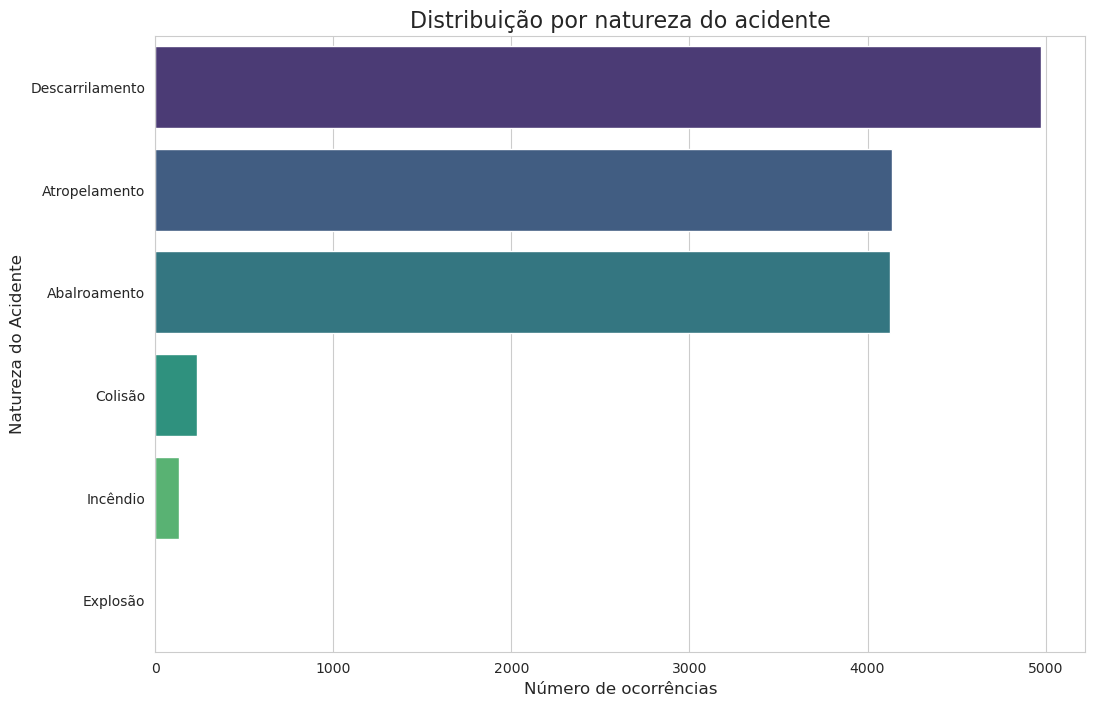

In [69]:
#Configurações inicias do gráfico
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))

#Criação do Gráfico
sns.barplot(x=contagem_natureza.values, y=contagem_natureza.index, palette='viridis')

#Títulos e Rótulos
plt.title ('Distribuição por natureza do acidente', fontsize=16)
plt.xlabel ('Número de ocorrências', fontsize=12)
plt.ylabel ('Natureza do Acidente', fontsize=12)

#Exibição
plt.show()

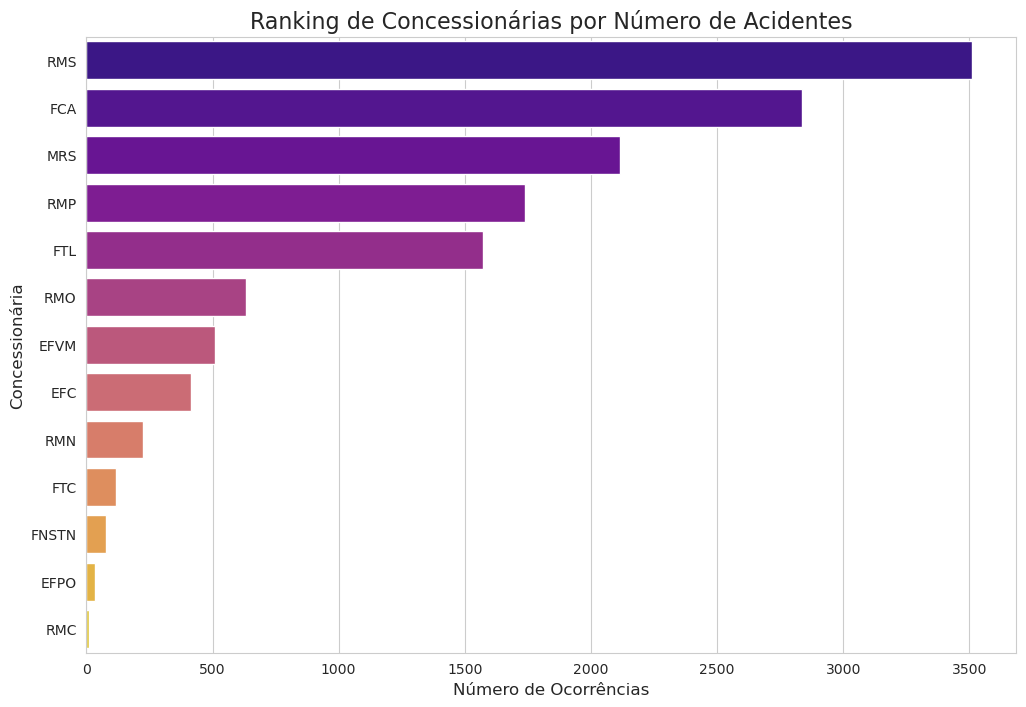

In [76]:
#Configurações do Gráfico
plt.figure(figsize=(12, 8))

#Criação do Gráfico
# Usamos os dados da contagem por concessionária e uma nova paleta de cores
sns.barplot(x=contagem_concessionarias.values, y=contagem_concessionarias.index, palette='plasma')

#Títulos e Rótulos
plt.title('Ranking de Concessionárias por Número de Acidentes', fontsize=16)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Concessionária', fontsize=12)

#Exibição
plt.show()

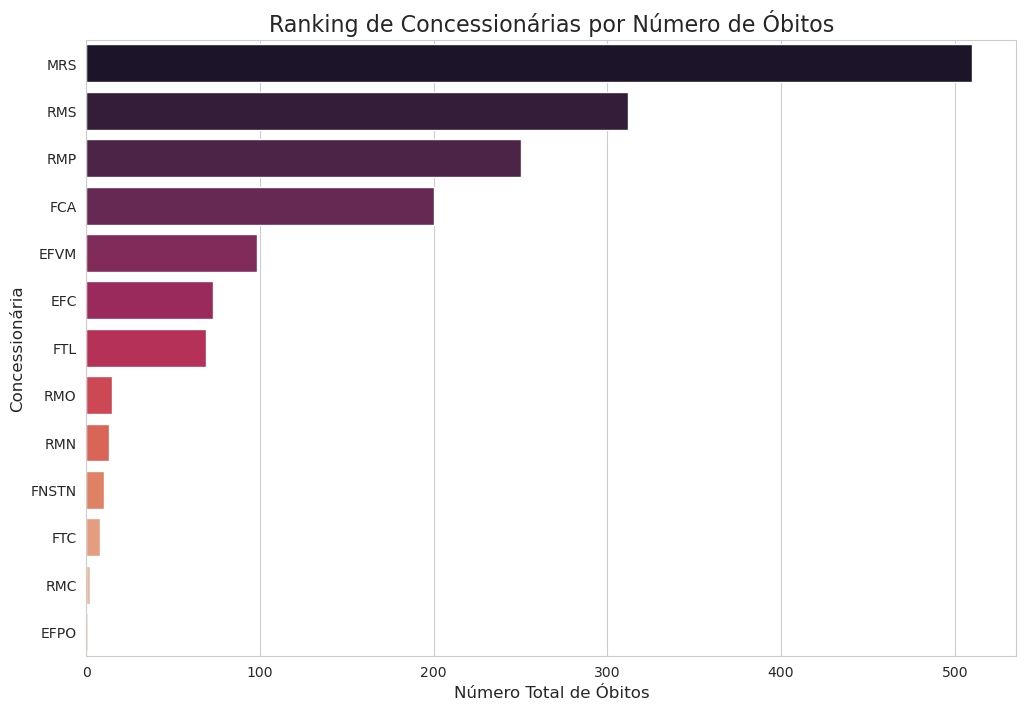

In [78]:
#Configurações do Gráfico
plt.figure(figsize=(12, 8))

#Criação do Gráfico
# Agora usamos os dados de óbitos por concessionária
sns.barplot(x=obitos_por_concessionaria.values, y=obitos_por_concessionaria.index, palette='rocket')

#Títulos e Rótulos
plt.title('Ranking de Concessionárias por Número de Óbitos', fontsize=16)
plt.xlabel('Número Total de Óbitos', fontsize=12)
plt.ylabel('Concessionária', fontsize=12)

# Exibição
plt.show()

In [79]:
#Faremos agora uma série temporal, mas antes precisamos preparar os dados para isso. 

#Contando os acidentes por ano e ordenando o resultdo pelo ano (o índice)
acidentes_por_ano = df['ano_ocorrencia'].value_counts().sort_index()

#Exibindo os dados que serão plotados
print (acidentes_por_ano)

ano_ocorrencia
2004     275
2005     261
2006     359
2007     320
2008     274
2009     327
2010     550
2011    1028
2012     959
2013     870
2014     833
2015     926
2016     693
2017     773
2018     856
2019     843
2020     734
2021     746
2022     782
2023     728
2024     660
Name: count, dtype: int64


/home/campagnoli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/campagnoli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


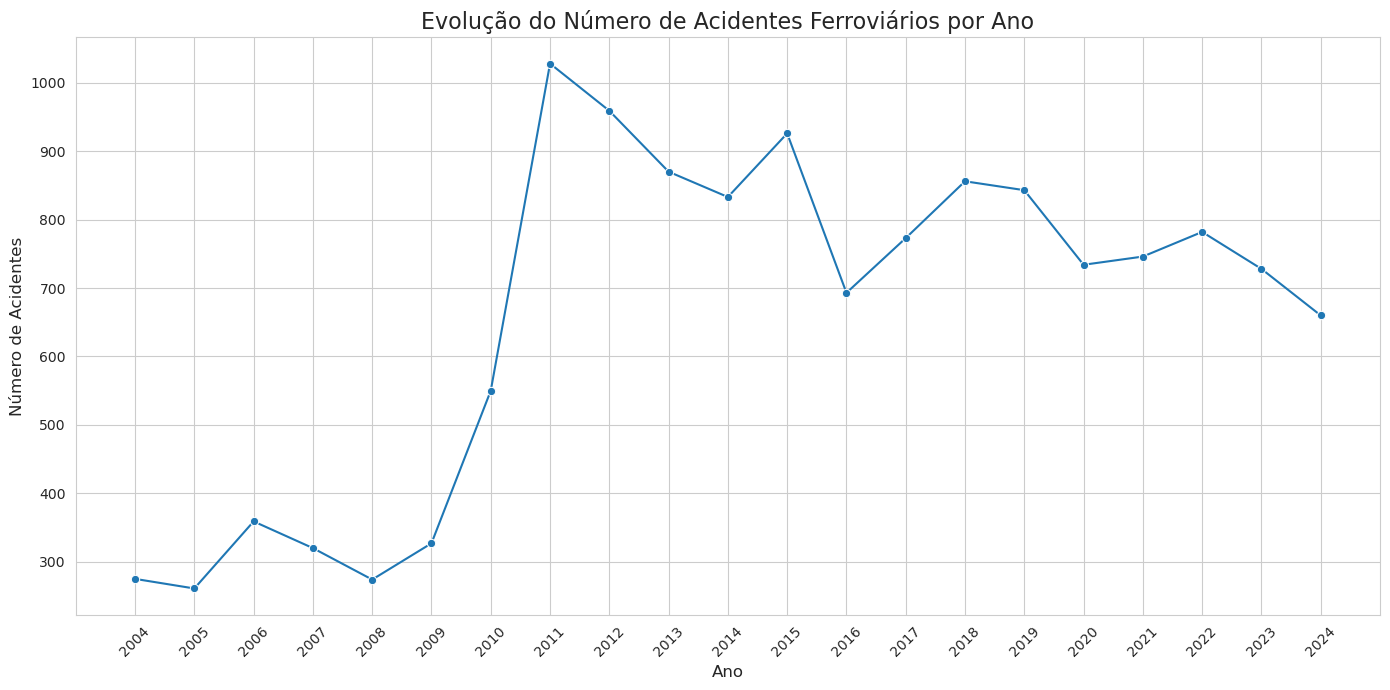

In [80]:
#Configurações do Gráfico
plt.figure(figsize=(14, 7))

#Criação do Gráfico de Linha
# Usamos a função lineplot. 
# Eixo X: os anos (índice da nossa série). Eixo Y: os valores (contagem de acidentes).
# 'marker="o"' adiciona um círculo em cada ponto de dado para melhor visualização.
sns.lineplot(x=acidentes_por_ano.index, y=acidentes_por_ano.values, marker='o')

#Títulos e Rótulos
plt.title('Evolução do Número de Acidentes Ferroviários por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)

# Melhorando os 'ticks' (marcas) do eixo X para mostrar todos os anos
# Isso evita que o Matplotlib pule alguns anos para economizar espaço
plt.xticks(acidentes_por_ano.index, rotation=45) 

# Garantindo que o layout fique bom, sem cortar os rótulos
plt.tight_layout()

#Exibição
plt.show()

## 🔮 5. Projeção com Séries Temporais (Forecasting)

**Objetivo:**
O objetivo desta seção é utilizar os dados históricos que analisamos para construir um modelo estatístico capaz de projetar a tendência do número de acidentes para os próximos 2 anos. É importante ressaltar que esta é uma **projeção educacional**, focada em aplicar a técnica, e não uma previsão de alta precisão para tomada de decisão crítica.

**O que é uma Série Temporal?**
O gráfico de linha que criamos na seção anterior é uma representação visual de uma **série temporal**: um conjunto de pontos de dados coletados em intervalos de tempo sequenciais (no nosso caso, anualmente).

**Metodologia:**
Usaremos a biblioteca `statsmodels`, uma poderosa ferramenta em Python para estatística e modelagem. O modelo que aplicaremos é o **SARIMA (Seasonal AutoRegressive Integrated Moving Average)**.

*   **Por que SARIMA?** É um dos modelos de séries temporais mais robustos e amplamente utilizados. Ele é capaz de capturar:
    *   **Tendência (Trend):** A direção geral dos dados (aumento ou diminuição ao longo do tempo).
    *   **Sazonalidade (Seasonality):** Padrões que se repetem em intervalos fixos (embora com dados anuais, a sazonalidade seja menos evidente, o modelo pode lidar com isso).
    *   **Autocorrelação:** A relação entre uma observação e as observações anteriores.

**Nosso processo será:**
1.  **Preparar os Dados:** Garantir que nossa série temporal (`acidentes_por_ano`) esteja em um formato adequado para o `statsmodels`.
2.  **Construir e Treinar o Modelo:** Instanciar o modelo SARIMA e "treiná-lo" com nossos dados históricos.
3.  **Gerar a Projeção:** Usar o modelo treinado para prever os valores dos próximos 2 anos.
4.  **Visualizar o Resultado:** Plotar os dados históricos junto com a projeção e um intervalo de confiança para entendermos a incerteza da previsão.

In [95]:
#Primeiro, vamos importar a biblioteca statmodels
import statsmodels as sm
import statsmodels.api as smt

In [86]:
#Vamos criar uma série temporal usando um DatetimIndex
serie_temporal = pd.Series(
    acidentes_por_ano.values,
    index=pd.to_datetime(acidentes_por_ano.index, format='%Y')
)

#Exibibindo o inicio da nossa série temporal 

print (serie_temporal.head())

ano_ocorrencia
2004-01-01    275
2005-01-01    261
2006-01-01    359
2007-01-01    320
2008-01-01    274
dtype: int64


In [101]:
#Definindo os parâmetros para o modelo SARIM (p,d,q) para a parte não-sazonal e (P,D,Q,m) para a sazonal.
sarima_model = smt.tsa.SARIMAX(serie_temporal,
                              order=(1, 1, 1),
                              seasonal_order=(1, 1, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)


#Treinando o modelo com os nossos dados 'disp=False' evita que o modelo imprima muitas informações de convergência
sarima_results = sarima_model.fit(disp=False)

#Exibindo um resumo do modelo treinado
print(sarima_results.summary())


/home/campagnoli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/campagnoli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/campagnoli/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/campagnoli/anaconda3/lib/python3.11/site-packages/statsmodels/tools/eval_measures.py:415: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/home/campagnoli/anaconda3/lib/python3.11/site-package

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   21
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Wed, 25 Jun 2025   AIC                             10.000
Time:                                    19:32:49   BIC                                nan
Sample:                                01-01-2004   HQIC                               nan
                                     - 01-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2665         -0        inf      0.000      -0.267      -0.267
ma.L1          0.6719         -0   

/home/campagnoli/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [105]:
#Gerando projeção para os próximos 2 passos (anos)

projecao = sarima_results.get_forecast(steps=2)

#Extraindo o intervalo de confiança da projeção. Ele nos dá um limite inferior e um superiro para cada ponto previsto
intervalo_confianca = projecao.conf_int()

#Exibindo os resultados da projeção 
print ("Projeção para os próximos 2 anos:")
print (projecao.predicted_mean)

print ('\nIntervalo de confiança')
print (intervalo_confianca)

Projeção para os próximos 2 anos:
2025-01-01    681.238454
2026-01-01    614.857517
Freq: YS-JAN, Name: predicted_mean, dtype: float64

Intervalo de confiança
               lower y      upper y
2025-01-01  160.358591  1202.118317
2026-01-01 -283.253644  1512.968678


In [ ]:
#Configurações do Gráfico
plt.figure(figsize=(14, 7))

# O índice já está no formato DatetimeIndex que o matplotlib entende.

#Plotando a série histórica
plt.plot(serie_temporal.index, serie_temporal.values, label='Dados Históricos', marker='o')

#Plotando a projeção
plt.plot(projecao.predicted_mean.index, projecao.predicted_mean.values, color='red', marker='o', label='Projeção (Forecast)')

#Plotando o intervalo de confiança
plt.fill_between(intervalo_confianca.index,
                 intervalo_confianca.iloc[:, 0], # Limite inferior
                 intervalo_confianca.iloc[:, 1], # Limite superior
                 color='pink',
                 alpha=0.5,
                 label='Intervalo de Confiança')

#Títulos e Rótulos
plt.title('Projeção de Acidentes Ferroviários para os Próximos 2 Anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)
plt.legend()
plt.grid(True)

#Exibição
plt.show()

## 📚 Apêndice: Glossário de Siglas

Para facilitar a compreensão da análise, segue abaixo o significado das principais siglas de concessionárias ferroviárias mencionadas neste estudo:

*   **RMS:** Rumo Malha Sul S.A.
*   **FCA:** Ferrovia Centro-Atlântica S.A.
*   **MRS:** MRS Logística S.A.
*   **RMP:** Rumo Malha Paulista S.A.
*   **FTL:** Ferrovia Transnordestina Logística S.A.
*   **RMO:** Rumo Malha Oeste S.A.
*   **EFVM:** Estrada de Ferro Vitória a Minas
*   **EFC:** Estrada de Ferro Carajás
*   **RMN:** Rumo Malha Norte S.A.
*   **FTC:** Ferrovia Tereza Cristina S.A.
*   **FNSTN:** Ferrovia Norte-Sul Tramo Norte


## ✅ 6. Conclusão

Este projeto realizou uma análise de ponta a ponta dos dados de acidentes ferroviários da ANTT, partindo da limpeza e preparação dos dados, passando pela análise exploratória e visualização, e culminando na construção de um modelo de projeção temporal.

**Principais Insights e Descobertas:**

*   **Qualidade dos Dados como Desafio Real:** O processo de limpeza foi fundamental. A padronização da coluna `perimetro_urbano` — que inicialmente continha mais de 3.000 valores distintos — foi um exemplo prático de como problemas de qualidade de dados podem impactar a análise. A solução revelou um insight poderoso: a esmagadora maioria dos acidentes (**13.776** contra apenas **21**) ocorre fora de perímetros urbanos.

*   **Natureza dos Acidentes:** A análise mostrou que três tipos de acidentes dominam as ocorrências: **Descarrilamento** (4.974), **Atropelamento** (4.138) e **Abalroamento** (4.125). Esses três juntos representam a grande maioria dos incidentes, indicando focos claros para possíveis ações de prevenção.

*   **Volume vs. Severidade nas Concessionárias:** A análise das concessionárias revelou uma distinção crítica entre volume e gravidade. A concessionária **RMS**, líder em número total de acidentes (3.511), ficou em segundo lugar em fatalidades (312). Em contrapartida, a **MRS**, terceira em volume de acidentes (2.117), foi a líder absoluta em número de óbitos (510), evidenciando que diferentes métricas contam histórias distintas sobre o risco operacional.

*   **Tendência Temporal:** A série histórica de acidentes, visualizada no gráfico de linha, mostrou um pico acentuado entre 2010 e 2015, seguido por um período de relativa estabilização em um patamar mais baixo, mas ainda com flutuações anuais.

*   **Projeção e Incerteza:** O modelo SARIMA projetou uma leve tendência de queda para os próximos dois anos (2025 e 2026). No entanto, o **amplo intervalo de confiança** da projeção é o achado mais importante aqui. Ele demonstra a alta incerteza inerente a previsões com um número limitado de pontos de dados anuais e nos lembra que modelos de forecasting são ferramentas de direcionamento, não "bolas de cristal".

**Considerações Finais**

Este projeto serve como um portfólio completo, demonstrando competência em todo o ciclo de vida de um projeto de dados: desde a manipulação de dados brutos e a resolução de problemas de qualidade até a geração de insights acionáveis e a aplicação de modelos estatísticos para projeção.